In [2]:
# so kernel doesn't have to be restarted
%load_ext autoreload
%autoreload 2

# sklearn imports
from sklearn.neighbors import NearestNeighbors, KNeighborsTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# imodels imports
from imodels import get_clean_dataset
from imodels.tree.rf_plus.rf_plus.rf_plus_models import RandomForestPlusClassifier
from imodels.tree.rf_plus.feature_importance.rfplus_explainer import RFPlusMDI

# data getters
from ucimlrepo import fetch_ucirepo
import openml

# local feature importance
import shap
import lime

# helper scripts
from knn_helper import *

In [1]:
# set params
k = 3
data_id = 361063
data_ids = [43, 9978, 361062, 361063, 361069, 361071]
nbr_dist = "l1"
cfact_dist = "l1"
use_preds = True

DATA ID: 43
Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear

Models Fit
LFI Values Retrieved
Opposite Neighbors Found Using 'l1' Distance
Average Distances Calculated


/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


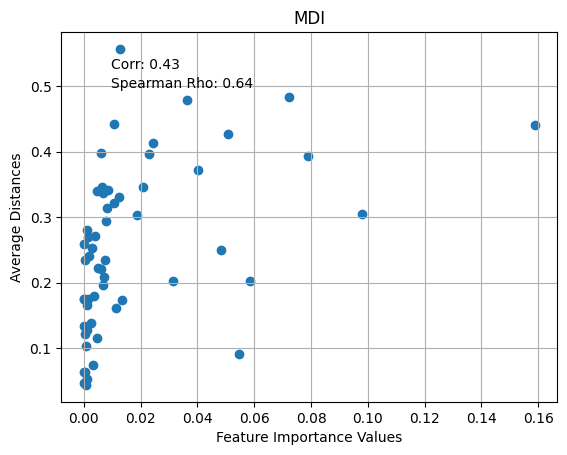

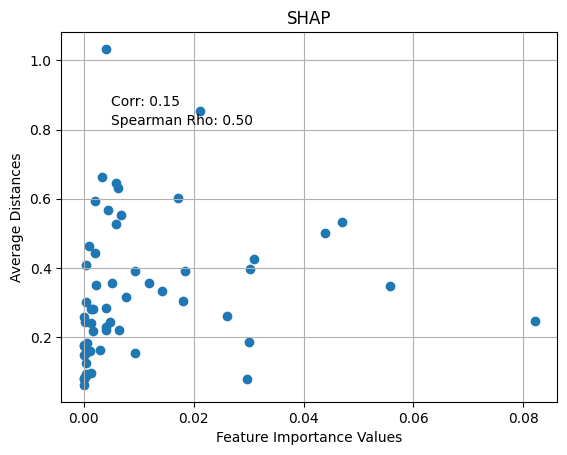

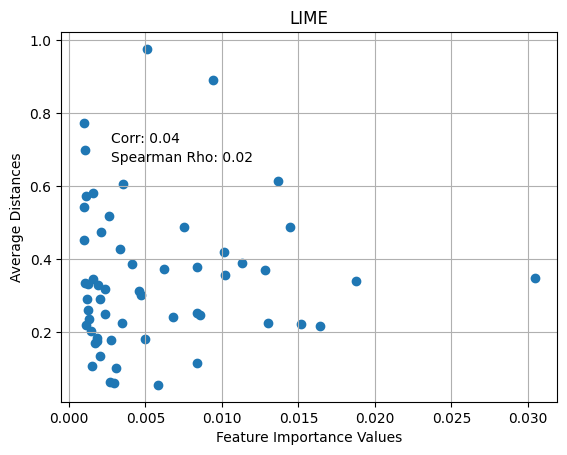

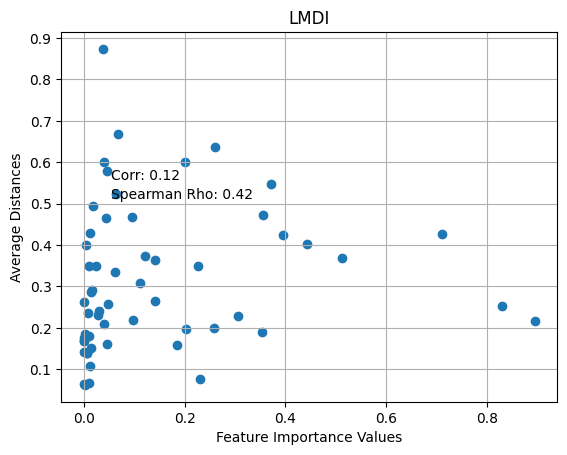

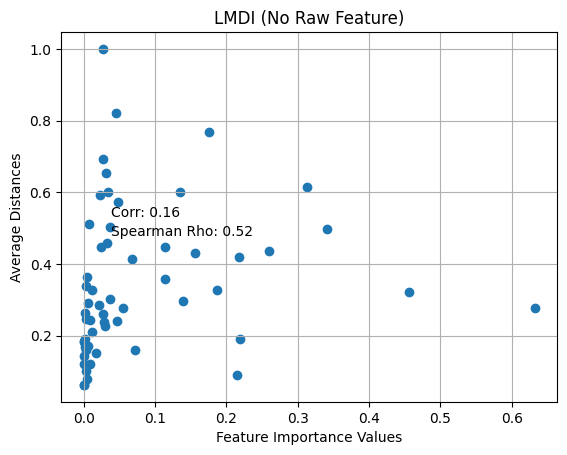

DATA ID: 9978
Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear

Models Fit
LFI Values Retrieved
Opposite Neighbors Found Using 'l1' Distance
Average Distances Calculated


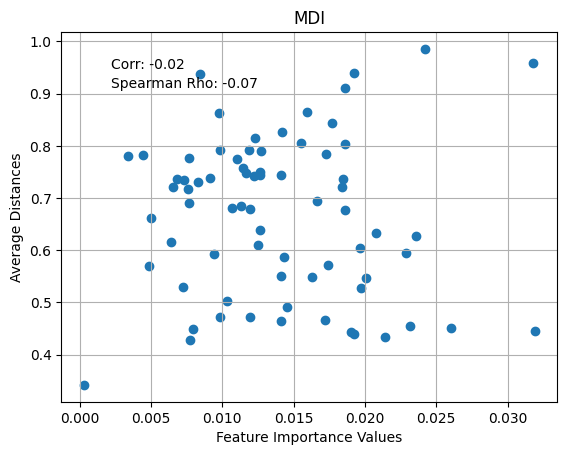

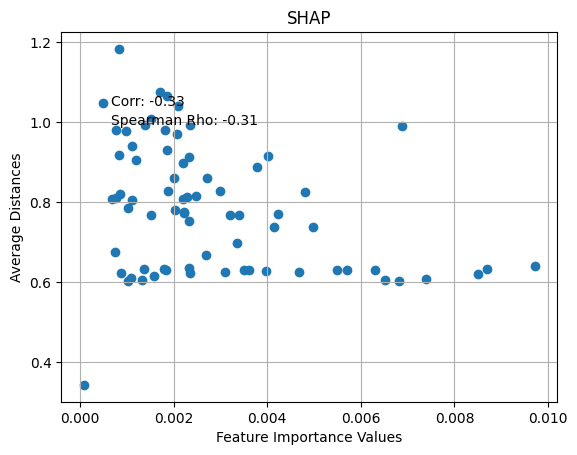

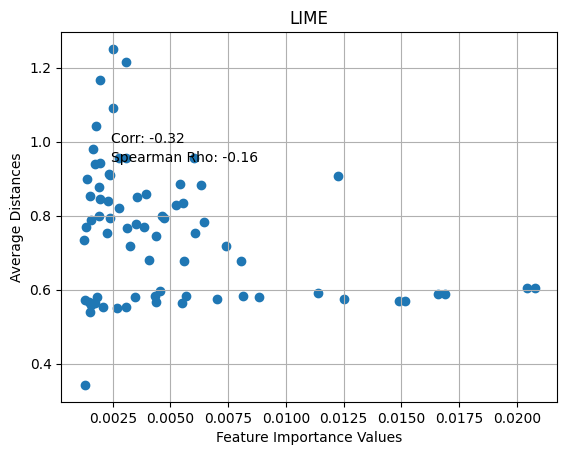

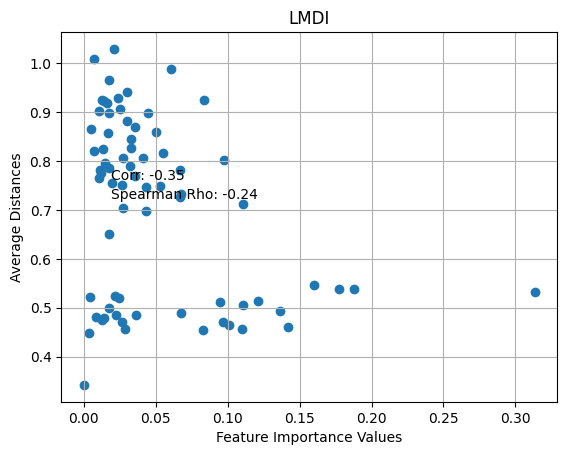

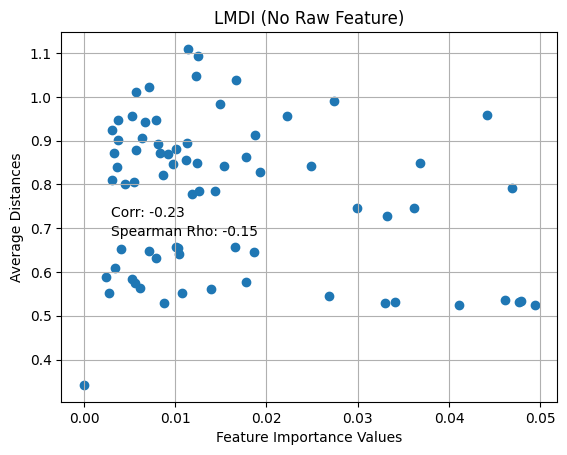

DATA ID: 361062
Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [3]:
for id in data_ids:
    print("DATA ID:", id)
    
    raw_distances, shap_distances, lime_distances, lmdi_distances, \
    lmdi_noraw_distances, mdi_vals, shap_vals, lime_vals, lmdi_vals,\
    lmdi_noraw_vals = perform_pipeline(k, id, nbr_dist, cfact_dist, use_preds,
                                    coord_dist=True, weight_by_imp=False)
    
    # get means
    shap_avg = np.mean(shap_vals, axis=0)
    lime_avg = np.mean(lime_vals, axis=0)
    lmdi_avg = np.mean(lmdi_vals, axis=0)
    lmdi_noraw_avg = np.mean(lmdi_noraw_vals, axis=0)

    # get medians
    shap_median = np.median(shap_vals, axis=0)
    lime_median = np.median(lime_vals, axis=0)
    lmdi_median = np.median(lmdi_vals, axis=0)
    lmdi_noraw_median = np.median(lmdi_noraw_vals, axis=0)

    # get variances
    shap_var = np.var(shap_vals, axis=0)
    lime_var = np.var(lime_vals, axis=0)
    lmdi_var = np.var(lmdi_vals, axis=0)
    lmdi_noraw_var = np.var(lmdi_noraw_vals, axis=0)
    
    
    # get mean distances to counterfactuals
    raw_dist_avg = np.mean(raw_distances, axis=0)
    shap_dist_avg = np.mean(shap_distances, axis=0)
    lime_dist_avg = np.mean(lime_distances, axis=0)
    lmdi_dist_avg = np.mean(lmdi_distances, axis=0)
    lmdi_noraw_dist_avg = np.mean(lmdi_noraw_distances, axis=0)

    # get median distances to counterfactuals
    raw_dist_median = np.median(raw_distances, axis=0)
    shap_dist_median = np.median(shap_distances, axis=0)
    lime_dist_median = np.median(lime_distances, axis=0)
    lmdi_dist_median = np.median(lmdi_distances, axis=0)
    lmdi_noraw_dist_median = np.median(lmdi_noraw_distances, axis=0)

    # get variance distances to counterfactuals
    raw_dist_var = np.var(raw_distances, axis=0)
    shap_dist_var = np.var(shap_distances, axis=0)
    lime_dist_var = np.var(lime_distances, axis=0)
    lmdi_dist_var = np.var(lmdi_distances, axis=0)
    lmdi_noraw_dist_var = np.var(lmdi_noraw_distances, axis=0)
    
    # plot distances versus values
    feature_importances = [mdi_vals, shap_avg, lime_avg, lmdi_avg, lmdi_noraw_avg]
    feature_distances = [raw_dist_avg, shap_dist_avg, lime_dist_avg,
                         lmdi_dist_avg, lmdi_noraw_dist_avg]
    labels = ['MDI', 'SHAP', 'LIME', 'LMDI', 'LMDI (No Raw Feature)']
    # feature_importances = [shap_avg, lime_avg, lmdi_avg, lmdi_noraw_avg]
    # feature_distances = [shap_dist_avg, lime_dist_avg,
    #                     lmdi_dist_avg, lmdi_noraw_dist_avg]
    # labels = ['SHAP', 'LIME', 'RFPlus MDI', 'RFPlus MDI (no raw)']
    for i in range(len(feature_importances)):
        plt.scatter(feature_importances[i], feature_distances[i], label=labels[i])
        plt.xlabel("Feature Importance Values")
        plt.ylabel("Average Distances")
        # plt.xscale("log")
        # plt.yscale("log")
        # plt.ylim(0.001, 1)
        # put correlation coefficient on the plot
        corr_coef = np.corrcoef(feature_importances[i], feature_distances[i])[0, 1]
        plt.text(0.1, 0.9 - i * 0.1, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes)
        # put spearman correlation on plot
        rho, _ = spearmanr(feature_importances[i], feature_distances[i])
        plt.text(0.1, 0.85 - i * 0.1, f"Spearman Rho: {rho:.2f}", transform=plt.gca().transAxes)
        plt.title(labels[i])
        plt.grid()
        plt.show()

In [ ]:
raw_distances, shap_distances, lime_distances, lmdi_distances, \
lmdi_noraw_distances, mdi_vals, shap_vals, lime_vals, lmdi_vals,\
lmdi_noraw_vals = perform_pipeline(k, data_id, nbr_dist, cfact_dist, use_preds,
                                   coord_dist=True, weight_by_imp=True)

Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear

Models Fit
LFI Values Retrieved
Opposite Neighbors Found Using 'l1' Distance
Average Distances Calculated


In [ ]:
# get means
shap_avg = np.mean(shap_vals, axis=0)
lime_avg = np.mean(lime_vals, axis=0)
lmdi_avg = np.mean(lmdi_vals, axis=0)
lmdi_noraw_avg = np.mean(lmdi_noraw_vals, axis=0)

# get medians
shap_median = np.median(shap_vals, axis=0)
lime_median = np.median(lime_vals, axis=0)
lmdi_median = np.median(lmdi_vals, axis=0)
lmdi_noraw_median = np.median(lmdi_noraw_vals, axis=0)

# get variances
shap_var = np.var(shap_vals, axis=0)
lime_var = np.var(lime_vals, axis=0)
lmdi_var = np.var(lmdi_vals, axis=0)
lmdi_noraw_var = np.var(lmdi_noraw_vals, axis=0)

In [ ]:
# get mean distances to counterfactuals
# raw_dist_avg = np.mean(raw_distances, axis=0)
shap_dist_avg = np.mean(shap_distances, axis=0)
lime_dist_avg = np.mean(lime_distances, axis=0)
lmdi_dist_avg = np.mean(lmdi_distances, axis=0)
lmdi_noraw_dist_avg = np.mean(lmdi_noraw_distances, axis=0)

# get median distances to counterfactuals
# raw_dist_median = np.median(raw_distances, axis=0)
shap_dist_median = np.median(shap_distances, axis=0)
lime_dist_median = np.median(lime_distances, axis=0)
lmdi_dist_median = np.median(lmdi_distances, axis=0)
lmdi_noraw_dist_median = np.median(lmdi_noraw_distances, axis=0)

# get variance distances to counterfactuals
# raw_dist_var = np.var(raw_distances, axis=0)
shap_dist_var = np.var(shap_distances, axis=0)
lime_dist_var = np.var(lime_distances, axis=0)
lmdi_dist_var = np.var(lmdi_distances, axis=0)
lmdi_noraw_dist_var = np.var(lmdi_noraw_distances, axis=0)

In [ ]:
lfi_tensor = np.array([shap_vals, lime_vals, lmdi_vals, lmdi_noraw_vals])
distance_tensor = np.array([shap_distances, lime_distances, lmdi_distances, lmdi_noraw_distances])
reordered_dist_tensor = np.array([shap_distances, lime_distances, lmdi_distances, lmdi_noraw_distances])
# reorder distances to match the order of mdi values
for i in range(lfi_tensor.shape[0]):
    reordered_dist_tensor[i] = distance_tensor[i][:, np.argsort(mdi_vals)]
reordered_feat_nums = np.arange(mdi_vals.shape[0])[np.argsort(mdi_vals)]

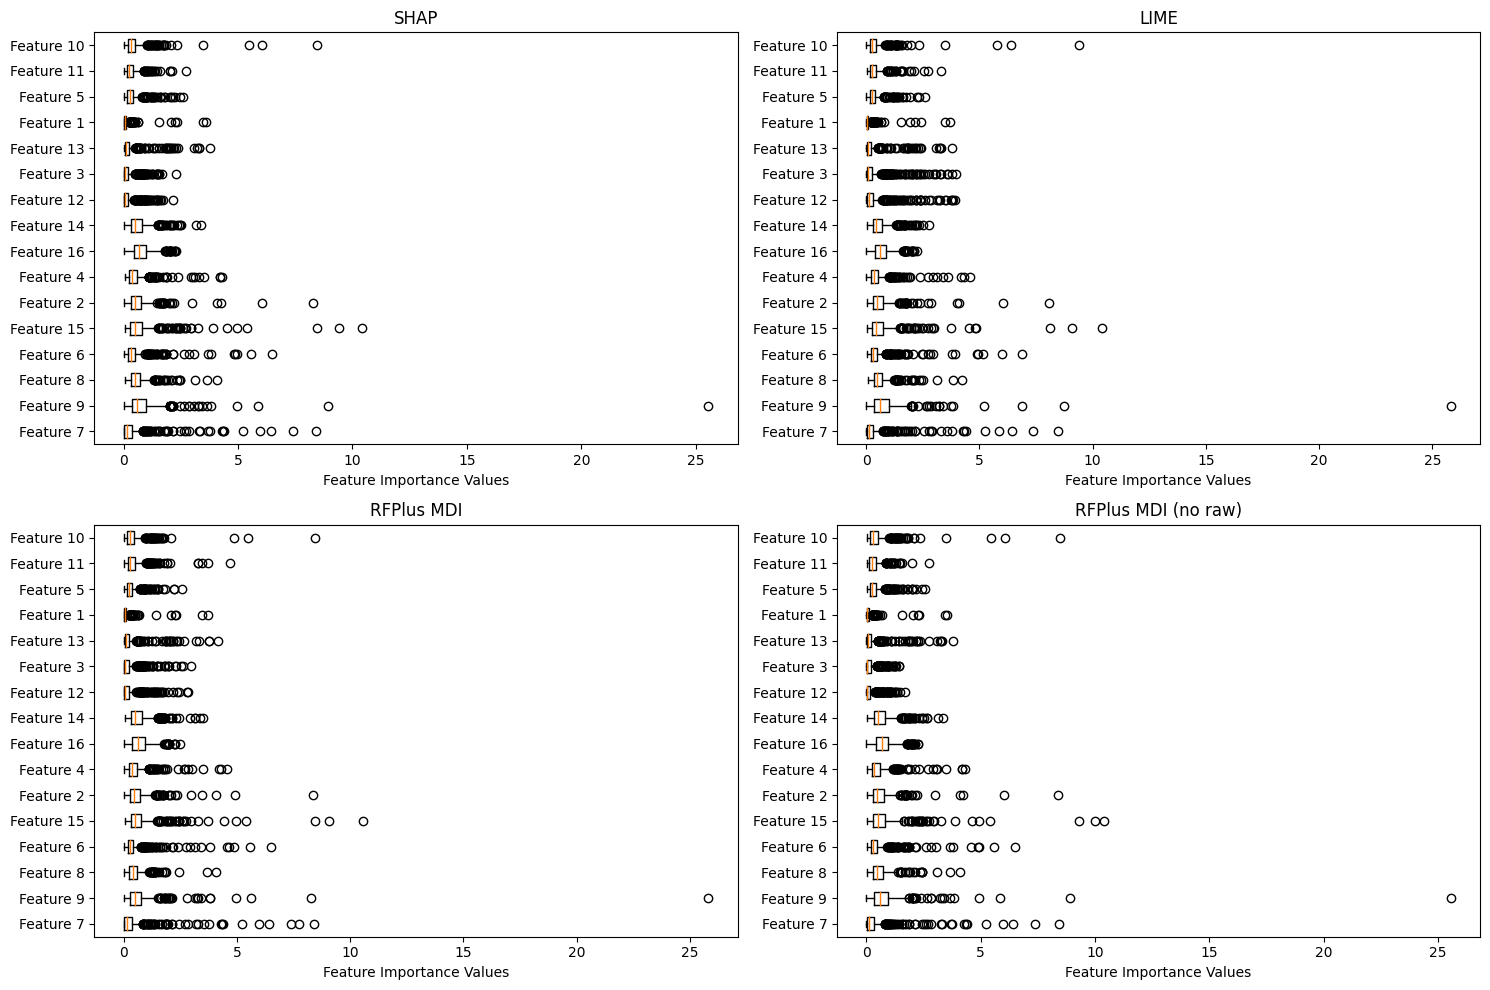

In [ ]:
# create 26 boxplots for each distance, with the features ordered by mdi importance
methods = ['SHAP', 'LIME', 'RFPlus MDI', 'RFPlus MDI (no raw)']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, method in enumerate(methods):
    axes[i].boxplot(reordered_dist_tensor[i], vert=False)
    axes[i].set_title(method)
    axes[i].set_xlabel('Feature Importance Values')
    axes[i].set_yticks(range(1, reordered_dist_tensor[i].shape[1] + 1))
    axes[i].set_yticklabels([f'Feature {reordered_feat_nums[j]+1}' for j in range(reordered_dist_tensor[i].shape[1])])
plt.tight_layout()
plt.show()

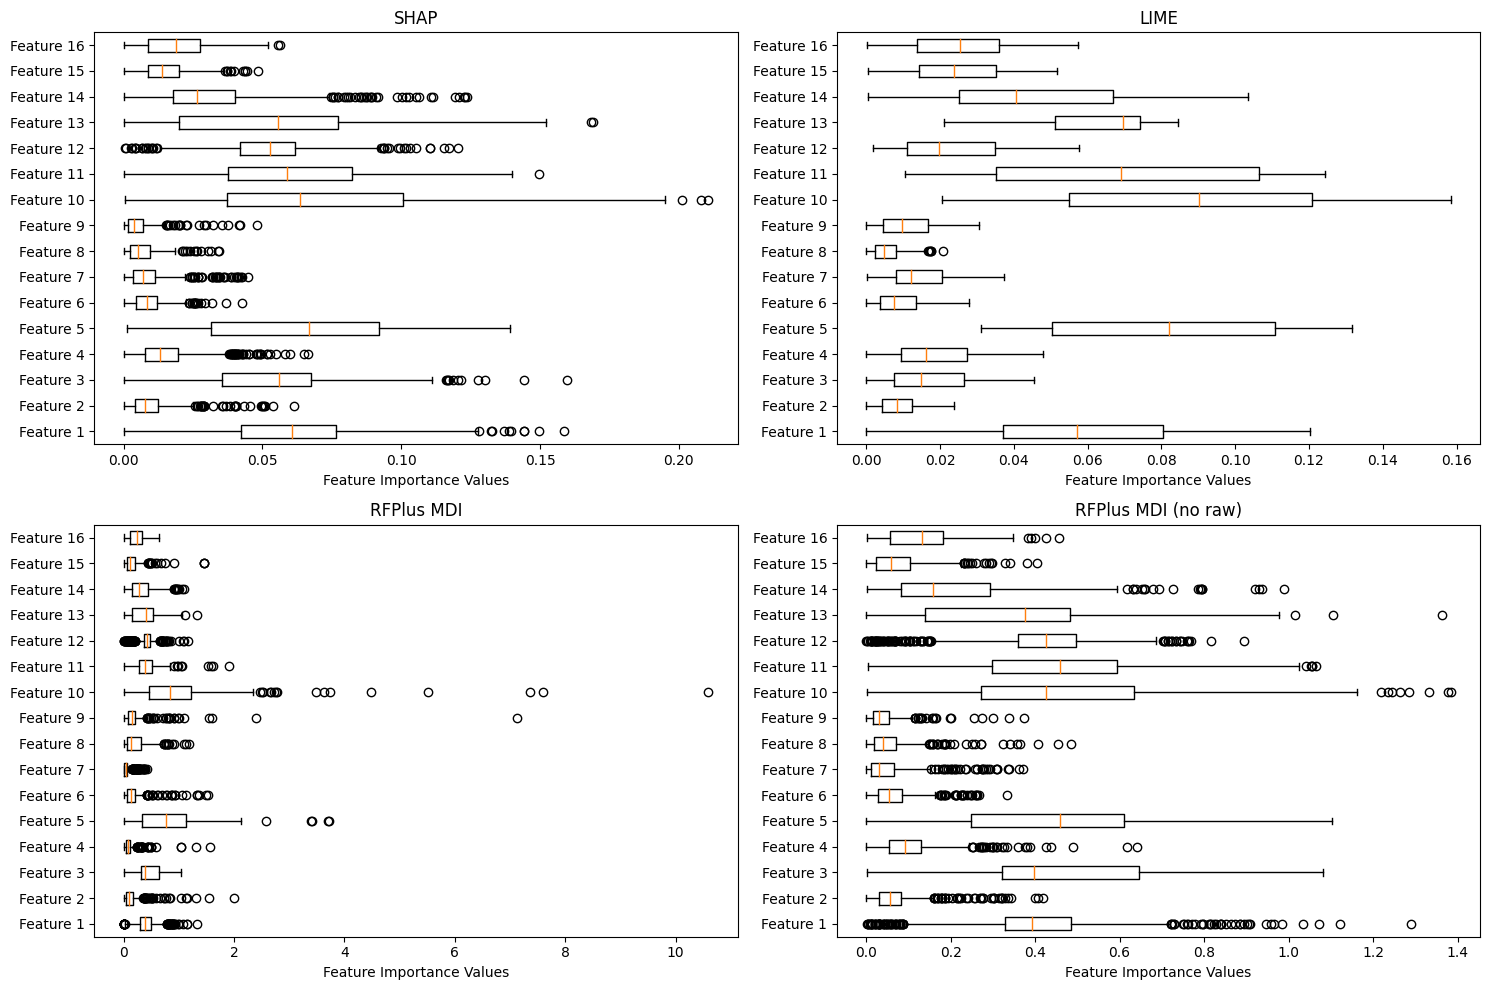

In [ ]:
# create 26 boxplots for each feature importance method
methods = ['SHAP', 'LIME', 'RFPlus MDI', 'RFPlus MDI (no raw)']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, method in enumerate(methods):
    axes[i].boxplot(lfi_tensor[i], vert=False)
    axes[i].set_title(method)
    axes[i].set_xlabel('Feature Importance Values')
    axes[i].set_yticks(range(1, lfi_tensor[i].shape[1] + 1))
    axes[i].set_yticklabels([f'Feature {j+1}' for j in range(lfi_tensor[i].shape[1])])
plt.tight_layout()
plt.show()


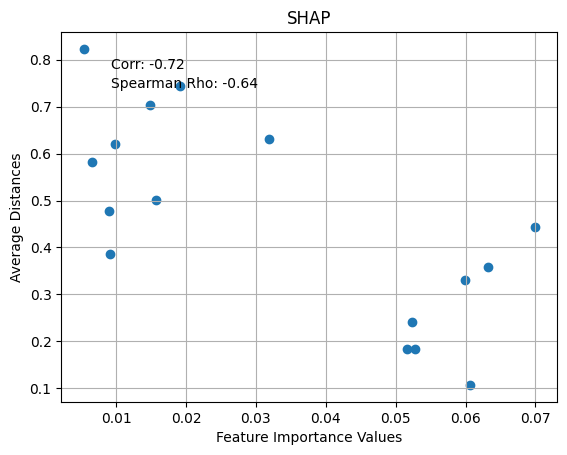

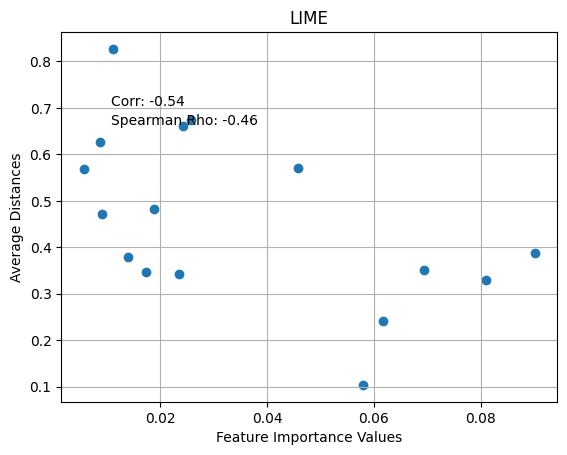

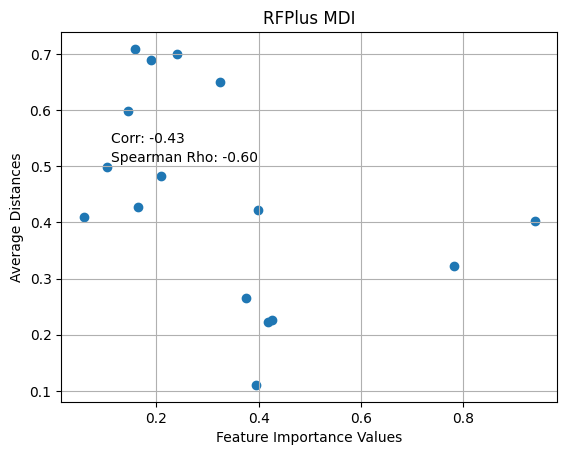

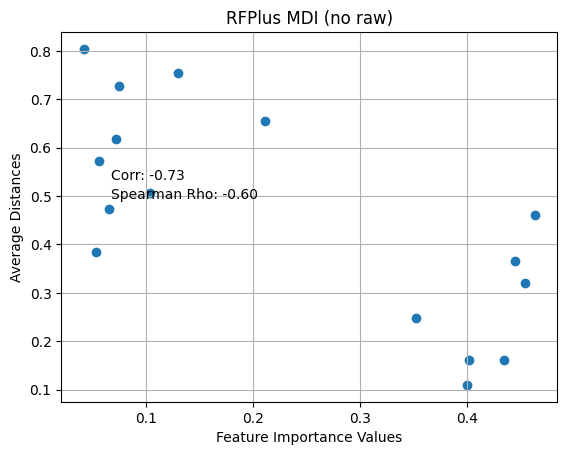

In [ ]:
# plot distances versus values
# feature_importances = [mdi_vals, shap_avg, lime_avg, lmdi_avg, lmdi_noraw_avg]
# feature_distances = [raw_dist_avg, shap_dist_avg, lime_dist_avg,
#                      lmdi_dist_avg, lmdi_noraw_dist_avg]
# labels = ['MDI', 'SHAP', 'LIME', 'LMDI', 'LMDI (No Raw Feature)']
feature_importances = [shap_avg, lime_avg, lmdi_avg, lmdi_noraw_avg]
feature_distances = [shap_dist_avg, lime_dist_avg,
                     lmdi_dist_avg, lmdi_noraw_dist_avg]
labels = ['SHAP', 'LIME', 'RFPlus MDI', 'RFPlus MDI (no raw)']
for i in range(len(feature_importances)):
    plt.scatter(feature_importances[i], feature_distances[i], label=labels[i])
    plt.xlabel("Feature Importance Values")
    plt.ylabel("Average Distances")
    # plt.xscale("log")
    # plt.yscale("log")
    # plt.ylim(0.001, 1)
    # put correlation coefficient on the plot
    corr_coef = np.corrcoef(feature_importances[i], feature_distances[i])[0, 1]
    plt.text(0.1, 0.9 - i * 0.1, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes)
    # put spearman correlation on plot
    rho, _ = spearmanr(feature_importances[i], feature_distances[i])
    plt.text(0.1, 0.85 - i * 0.1, f"Spearman Rho: {rho:.2f}", transform=plt.gca().transAxes)
    plt.title(labels[i])
    plt.grid()
    plt.show()